nodes visited   743840830
cache space     30000034
nodes stored    30000024
nodes forgotten 453038442
current depth   0
current node    
role: max
root  : work: 357940951,      0 won,      0 not lost, INF    not won, INF    lost

role: min
(1, 2): work:  42694135,   8920 won,   8883 not lost,   1859 not won,   5282 lost
(1, 1): work:  59846041,   8893 won,   8585 not lost,   4046 not won,   6927 lost
(2, 2): work: 255400774,      0 won,      0 not lost, INF    not won, INF    lost

time 2590.54565005
(2, 2)
	(6, 7)(0, 3)
		(0, 2)(2, 6)
			(6, 1)(0, 5)
				(1, 6)(3, 0)
				(2, 7)(6, 3)
			(7, 0)(3, 0)
				(1, 1)(4, 4)
				(1, 2)(3, 8)
			(7, 1)(4, 4)
				(5, 3)??
				(5, 4)(7, 5)
				(5, 5)(7, 8)
			(7, 2)(3, 6)
				(1, 1)(4, 4)
			(8, 2)(6, 6)
				(1, 1)(5, 3)
				(1, 2)(3, 8)
		(1, 1)(4, 4)
			(5, 3)(8, 2)
				(6, 6)(1, 2)
				(6, 8)??
				(7, 6)??
				(7, 7)(5, 4)
				(7, 8)??
				(8, 7)(6, 3)
			(5, 4)(6, 3)
				(0, 2)(0, 7)
				(1, 2)(3, 7)
			(5, 5)(6, 6)
				(0, 2)(0, 7)
				(1, 

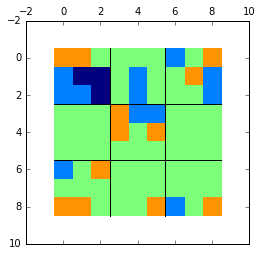

In [1]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,0),(0,1),(0,8),(1,7),(4,3),(4,5),(8,0),(8,1),(8,8)]:
    board[x]=1
for o in [(1,0),(2,0),(1,4),(2,4),(1,8),(2,8),(3,4),(3,5),(6,0)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(3,3),(2,1),(8,5),(8,6),(6,2),(0,6)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()

tact.fancy_board(game)
t0 = time.clock()
# cProfile.run('node,tree = dfpn.solve(game,root = True,epsilon=1.1)',sort = 'tottime')
node,tree = dfpn.solve(game,root = True,epsilon=1.02)
print 'time',time.clock() - t0
print tree